In [1]:
import copy, math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Admission_Predict.csv')

df.head()
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [3]:
df = df.rename({
    'Serial No.': 'Id',
    'GRE Score': 'GRE', 
    'TOEFL Score': 'TOEFL', 
    'University Rating': 'UniversityRating', 
    'SOP': 'StatementOfPurpose',
    'LOR ': 'LetterOfRec', 
    'CGPA': 'CGPA', 
    'Research': 'Research', 
    'Chance of Admit ': 'ChanceOfAdmit'
}, axis=1)

df.drop('TOEFL', axis=1, inplace=True)
df.drop('Id', axis=1, inplace=True)

df.head()


,GRE,UniversityRating,StatementOfPurpose,LetterOfRec,CGPA,Research,ChanceOfAdmit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


In [9]:
def predict(x, w, b):
    """
    @param x (ndarray): Shape (n,) example with multiple features
    @param w (ndarray): Shape (n,) model parameters   
    @param b (scalar):             model parameter 

    @return p (scalar):  prediction
    """

    return np.dot(x, w) + b

def compute_cost(X, y, w, b):
    """
    @param X (ndarray): Shape (m,n) training data m examples with n features
    @param y (ndarray): Shape (m,) target values
    @param x (ndarray): Shape (n,) weight for each feature
    @param b (scalar) : model parameter

    @return cost (scalar): one-half mean squared error loss
    """

    m = X.shape[0]
    cost = 0

    for i in range(m):
        prediction = predict(X[i], w, b)
        cost += (prediction - y[i]) ** 2

    cost /= (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """

    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        error = predict(X[i], w, b) - y[i]

        for ii in range(n):
            dj_dw[ii] += error * X[i,ii]

        dj_db += error

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        print(f"Iteration No. {i}")

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = compute_gradient(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
      
        # Save cost J at each iteration
        if i<1000:      # prevent resource exhaustion
            cost = compute_cost(X, y, w, b)
            print(f"Cost: {cost}")
            J_history.append(cost)
        
    return w, b, J_history

In [24]:
x_train = df.drop('ChanceOfAdmit', axis=1).values
y_train = df["ChanceOfAdmit"].values

w_init = np.zeros((x_train.shape[1],))
b_init = 0

print(x_train.shape)
print(y_train.shape)
df.head()


(400, 6)
(400,)


,GRE,UniversityRating,StatementOfPurpose,LetterOfRec,CGPA,Research,ChanceOfAdmit
0,337,4,4.5,4.5,9.65,1,0.92
1,324,4,4.0,4.5,8.87,1,0.76
2,316,3,3.0,3.5,8.00,1,0.72
3,322,3,3.5,2.5,8.67,1,0.80
4,314,2,2.0,3.0,8.21,0,0.65


In [30]:
x_train = df.drop('ChanceOfAdmit', axis=1).values
y_train = df.loc[:, "ChanceOfAdmit"].values

w_init = np.zeros((x_train.shape[1],))
b_init = 0

alpha_init = 0.01
num_iterations = 100

w, b, J_history = gradient_descent(
    x_train, 
    y_train, 
    w_init, 
    b_init, 
    compute_cost, 
    compute_gradient, 
    alpha_init, 
    num_iterations
)

print(f"Model paramters found using batch gradient descent. {b} {w}")
print(f"Randomly Selected Prediction: {predict(x_train[15], w, b)}")
print(f"Randomly Selected Target: {y_train[15]}")

Iteration No. 0
Cost: 267700.8384694746
Iteration No. 1
Cost: 270423217061.0525
Iteration No. 2
Cost: 2.7317328828018208e+17
Iteration No. 3
Cost: 2.759513263721064e+23
Iteration No. 4
Cost: 2.7875761574617047e+29
Iteration No. 5
Cost: 2.815924437040295e+35
Iteration No. 6
Cost: 2.8445610046905535e+41
Iteration No. 7
Cost: 2.8734887921604914e+47
Iteration No. 8
Cost: 2.902710761012553e+53
Iteration No. 9
Cost: 2.9322299029268265e+59
Iteration No. 10
Cost: 2.9620492400073095e+65
Iteration No. 11
Cost: 2.992171825091301e+71
Iteration No. 12
Cost: 3.022600742061985e+77
Iteration No. 13
Cost: 3.053339106164103e+83
Iteration No. 14
Cost: 3.0843900643228895e+89
Iteration No. 15
Cost: 3.11575679546629e+95
Iteration No. 16
Cost: 3.147442510850366e+101
Iteration No. 17
Cost: 3.179450454388079e+107
Iteration No. 18
Cost: 3.211783902981402e+113
Iteration No. 19
Cost: 3.24444616685678e+119
Iteration No. 20
Cost: 3.2774405899040393e+125
Iteration No. 21
Cost: 3.3107705500187158e+131
Iteration No. 2

/var/folders/dq/8p5r6j_94w1c8b4vh7tf4mxc0000gn/T/ipykernel_2419/551365322.py:27: RuntimeWarning: overflow encountered in double_scalars
  cost += (prediction - y[i]) ** 2


Cost: inf
Iteration No. 71
Cost: inf
Iteration No. 72
Cost: inf
Iteration No. 73
Cost: inf
Iteration No. 74
Cost: inf
Iteration No. 75
Cost: inf
Iteration No. 76
Cost: inf
Iteration No. 77
Cost: inf
Iteration No. 78
Cost: inf
Iteration No. 79
Cost: inf
Iteration No. 80
Cost: inf
Iteration No. 81
Cost: inf
Iteration No. 82
Cost: inf
Iteration No. 83
Cost: inf
Iteration No. 84
Cost: inf
Iteration No. 85
Cost: inf
Iteration No. 86
Cost: inf
Iteration No. 87
Cost: inf
Iteration No. 88
Cost: inf
Iteration No. 89
Cost: inf
Iteration No. 90
Cost: inf
Iteration No. 91
Cost: inf
Iteration No. 92
Cost: inf
Iteration No. 93
Cost: inf
Iteration No. 94
Cost: inf
Iteration No. 95
Cost: inf
Iteration No. 96
Cost: inf
Iteration No. 97
Cost: inf
Iteration No. 98
Cost: inf
Iteration No. 99
Cost: inf
Model paramters found using batch gradient descent. -1.1993377761704392e+295 [-3.80457243e+297 -3.73623510e+295 -4.10459967e+295 -4.16251827e+295
 -1.03346046e+296 -6.69199442e+294]
Randomly Selected Predict

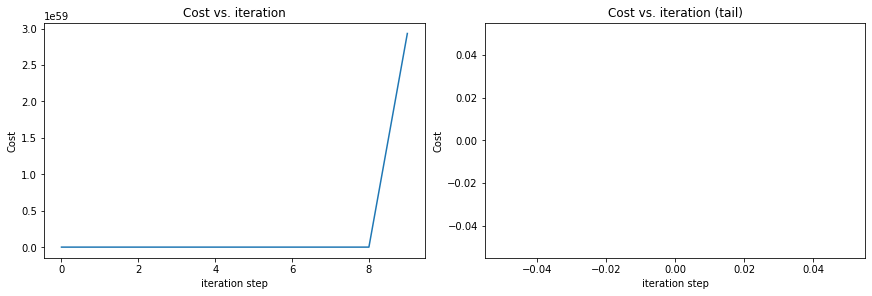

In [29]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()